# Project: Investigate a Dataset - TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href='#intro'>Introduction</a></li>
<li><a href='#wrangling'>Data Wrangling</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#conclusions'>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

#### Columns in dataset

The following columns are in the dataset:

- id - database identifier
- imdb_id - imdb database identifier
- popularity - metric based on collected website statistics
- budget
- revenue
- original_title - movie title
- cast - list of cast members
- homepage - link to movie website
- director - list of directors
- tagline - movie tagline
- keywords - list of keywords
- overview - short description of plot
- runtime - runtime in minutes
- genres - list of genres
- production_companies - list of production companies
- release_date - release date
- vote_count - total number of ratings
- vote_average - average rating (1-10)
- release_year - release year
- budget_adj - budget adjusted for inflation
- revenue_adj - revenue adjusted for inflation


### Question(s) for Analysis

The following questions are selected as the objective for this analysis:

1. What are the most significant trends in average rating which can be identified with quantitative parameters?

2. What are the most significant qualitative parameters for average rating and what are examples of the most successul values of each parameter?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install --upgrade seaborn

# Change pandas display options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)
Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Import and analyse dataset

1. Read the csv to a Pandas dataframe.
2. Drop the following columns: `"id", "imdb_id", "homepage", "overview", "tagline"` as they are not likely provide valuable data for the analysis.
3. Show the dataframe head to analyse data structures


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# 1. Read the csv to a Pandas dataframe.
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

# 2. Drop the following columns: `"id", "imdb_id", "homepage", "overview", "tagline"` as they are not likely provide valuable data for the analysis.
df = df.drop(columns=["id", "imdb_id", "homepage", "overview", "tagline"])

# 3. Show the dataframe head to analyse data structures
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Convert columns to lists

1. Transform columns separated by '|' into lists: `"cast", "keywords", "genres", "production_companies"` to allow data processing of these parameters later


In [4]:
# 1. Transform columns separated by '|' into lists: `"cast", "keywords", "genres", "production_companies"` to allow data processing of these parameters later
df[["cast", "keywords", "genres", "production_companies"]] = df[
    ["cast", "keywords", "genres", "production_companies"]
].apply(lambda x: x.str.split("|"))

df.head()


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check column data types
df.dtypes


popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Dataset analysis

1. Analyse top and bottom ranked films

In [6]:
# Sort movies by rating and analyse
df.sort_values(by=["vote_average"], ascending=False)
# print(.head())


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,"[Mark Cousins, Jean-Michel Frodon, Cari Beauch...",Mark Cousins,"[cinema, nouvelle vague, hindi cinema, cinema ...",900,[Documentary],NaN,9/3/11,14,9.2,2011,0.000000e+00,0.000000e+00
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"[feminism, sexism, young boy, gender roles, mi...",88,[Documentary],NaN,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
2269,0.222293,0,0,Life Cycles,NaN,Derek Frankowski,"[sport, cycling]",47,[Documentary],NaN,10/2/10,27,8.8,2010,0.000000e+00,0.000000e+00
1200,0.129531,0,0,Black Mirror: White Christmas,"[Jon Hamm, Rafe Spall, Oona Chaplin, Natalia T...",Carl Tibbetts,"[artificial intelligence, confession, technolo...",74,"[Drama, Horror, Mystery, Science Fiction, Thri...",NaN,12/16/14,41,8.8,2014,0.000000e+00,0.000000e+00
6911,0.212010,0,0,Pink Floyd: Pulse,"[David Gilmour, Nick Mason, Richard Wright, Sa...",David Mallet,[live concert],145,[Music],"[SMV Enterprises, Columbia Music Video, EMI]",7/9/06,23,8.7,2006,0.000000e+00,0.000000e+00
2401,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"[Mikael Ã…kerfeldt, Martin ""Axe"" Axenrot, Mart...",NaN,NaN,163,[Music],NaN,9/21/10,10,8.6,2010,0.000000e+00,0.000000e+00
3690,0.321341,0,0,The Art of Flight,"[Travis Rice, Nicolas Muller, Mark Landvik, Ja...",Curt Morgan,"[sport, snowboard]",80,"[Adventure, Documentary]","[Red Bull Media House, Brain Farm Digital Cinema]",9/8/11,60,8.5,2011,0.000000e+00,0.000000e+00
8411,0.302908,0,0,Queen - Rock Montreal,"[Freddie Mercury, Roger Taylor, John Deacon, B...",Saul Swimmer,[live concert],138,[Music],[Edel records GmbH],11/24/81,14,8.5,1981,0.000000e+00,0.000000e+00
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,"[Martin Scorsese, Brian De Palma, Gregory Peck...",Martin Scorsese|Michael Henry Wilson,NaN,225,[Documentary],"[Miramax Films, British Film Institute (BFI)]",5/21/95,11,8.5,1995,0.000000e+00,0.000000e+00
5830,0.248944,0,0,Doctor Who: The Time of the Doctor,"[Matt Smith, Jenna Coleman]",James Payne,NaN,60,NaN,NaN,12/25/13,26,8.5,2013,0.000000e+00,0.000000e+00


Note that the highest rated movies are niche and have few votes, such as **The Story of Film: An Odyssey** - a 15-hour documentary on the history of film. These films may appeal to specific small groups who are already likely to rate them highly. To analyse films with more mass-appeal, it may be useful to filter the dataset to remove rows which do not meet a minimum number of `vote_count`. Note these films also mostly have `revenue` and `budget = 0`, and this could be another filter parameter. 



### Data Cleaning 

#### Dataset filtering

1. Keep rows where `vote_count >= 100`. This is to filter out films which are outliers which have received few ratings.
2. Sort movies by rating and analyse

In [7]:
# 1. Keep rows where `vote_count >= 100`. This is to filter out films which are outliers which have received few ratings.
filtered_df = df.query("vote_count >= 100")

# 2. Sort movies by rating and analyse
filtered_df.sort_values(by=["vote_average"], ascending=False).head(20)



,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,7.192039,25000000,28341469,The Shawshank Redemption,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",Frank Darabont,"[prison, corruption, police brutality, prison ...",142,"[Drama, Crime]",[Castle Rock Entertainment],9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07
7269,5.738034,6000000,245066411,The Godfather,"[Marlon Brando, Al Pacino, James Caan, Richard...",Francis Ford Coppola,"[italy, love at first sight, loss of father, p...",175,"[Drama, Crime]","[Paramount Pictures, Alfran Productions]",3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09
650,4.780419,3300000,13993093,Whiplash,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",Damien Chazelle,"[jazz, obsession, conservatory, music teacher,...",105,"[Drama, Music]","[Bold Films, Blumhouse Productions, Right of W...",10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
2875,8.466668,185000000,1001921825,The Dark Knight,"[Christian Bale, Michael Caine, Heath Ledger, ...",Christopher Nolan,"[dc comics, crime fighter, secret identity, sc...",152,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Warner Bros., ...",7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
2409,8.947905,63000000,100853753,Fight Club,"[Edward Norton, Brad Pitt, Meat Loaf, Jared Le...",David Fincher,"[support group, dual identity, nihilism, rage ...",139,[Drama],"[Regency Enterprises, Fox 2000 Pictures, Tauru...",10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08
10222,2.377288,22000000,321265768,Schindler's List,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",Steven Spielberg,"[factory, concentration camp, hero, holocaust,...",195,"[Drama, History, War]","[Universal Pictures, Amblin Entertainment]",11/29/93,2632,8.1,1993,3.320834e+07,4.849410e+08
9758,3.264571,13000000,47542841,The Godfather: Part II,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",Francis Ford Coppola,"[italo-american, cuba, vororte, melancholy, pr...",200,"[Drama, Crime]","[Paramount Pictures, The Coppola Company]",12/20/74,2131,8.1,1974,5.748969e+07,2.102479e+08
4177,8.093754,8000000,213928762,Pulp Fiction,"[John Travolta, Samuel L. Jackson, Uma Thurman...",Quentin Tarantino,"[transporter, brothel, drug dealer, boxer, mas...",154,"[Thriller, Crime]","[Miramax Films, A Band Apart, Jersey Films]",10/14/94,5343,8.1,1994,1.176889e+07,3.147131e+08
4179,6.715966,55000000,677945399,Forrest Gump,"[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...",Robert Zemeckis,"[vietnam veteran, hippie, mentally disabled, r...",142,"[Comedy, Drama, Romance]",[Paramount Pictures],7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
2414,2.719461,60000000,284600000,The Green Mile,"[Tom Hanks, Michael Clarke Duncan, David Morse...",Frank Darabont,"[southern u.s., black people, mentally disable...",189,"[Fantasy, Drama, Crime]","[Castle Rock Entertainment, Darkwoods Producti...",12/10/99,2299,8.0,1999,7.854317e+07,3.725564e+08


<a id='eda'></a>
## Exploratory Data Analysis

### 1. What are the most significant trends in average rating which can be identified with quantitative parameters?


#### Investigate correlation between number of votes and rating

As mentioned in the data cleaning, many of the top-rated movies in the database are niche movies with low numbers of ratings. First we can investigate if there is a correlation between the number of ratings a movie has and the score. 

#### Correlation and visualisation of numerical parameters

1. Get numerical columns
2. Compute the pairwise correlation between columns
3. Create scatter matrix plot 

In [8]:
# 1. Get numerical columns
num_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns

# 2. Compute the pairwise correlation between columns
corr = filtered_df[num_cols].corr()

print(corr)

              popularity    budget   revenue   runtime  vote_count  \
popularity      1.000000  0.417643  0.581875  0.198972    0.755745   
budget          0.417643  1.000000  0.694957  0.279086    0.547958   
revenue         0.581875  0.694957  1.000000  0.251772    0.736804   
runtime         0.198972  0.279086  0.251772  1.000000    0.261944   
vote_count      0.755745  0.547958  0.736804  0.261944    1.000000   
vote_average    0.263027 -0.045740  0.159581  0.248402    0.346119   
release_year    0.088348  0.159793  0.039376 -0.123785    0.123355   
budget_adj      0.379872  0.969396  0.676305  0.322907    0.500586   
revenue_adj     0.515601  0.544911  0.903036  0.269315    0.638048   

              vote_average  release_year  budget_adj  revenue_adj  
popularity        0.263027      0.088348    0.379872     0.515601  
budget           -0.045740      0.159793    0.969396     0.544911  
revenue           0.159581      0.039376    0.676305     0.903036  
runtime           0.248402 

The numerical parameters with the strongest correlations to `vote_average` are:

1. `vote_count`
2. `popularity`
3. `runtime`
4. `release_year` (-ve)

The `popularity` metric is calculated from a variety of user data collected by TMDB and cannot be used as an indicator for film rating as it is calculated post-release. It also has a high correlation with `vote_count` which we can use instead. Although `vote_count` is also a parameter calculated post-release we can assume that films which reach a wider audience will have a higher value for `vote_count`.

To answer this question, we will look at the other three parameters.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

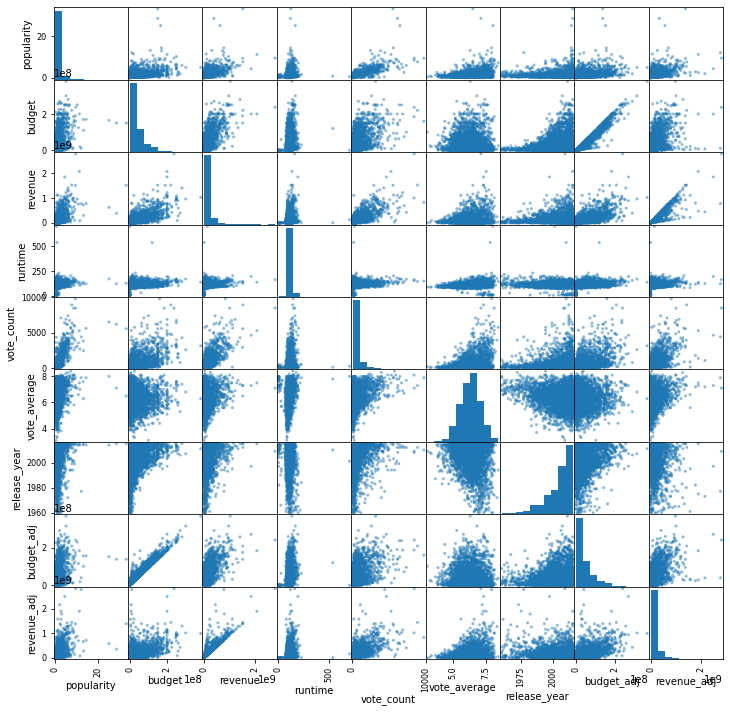

In [9]:
# Get numerical columns
num_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns

# 3. Create scatter matrix plot 
pd.plotting.scatter_matrix(filtered_df[num_cols], figsize=(12, 12))

# Show the plot
plt.show()


#### Number of votes analysis

1. Plot histogram of movies by number of votes

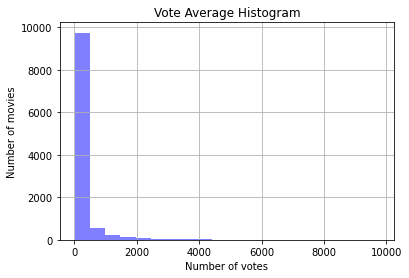

In [10]:
# 1. Plot histogram of movies by number of votes
df["vote_count"].hist(
    bins=20,
    range=(df["vote_count"].min(), df["vote_count"].max()),
    alpha=0.5,
    color="b",
)

# Add a title and labels to the plot
plt.title("Vote Average Histogram")
plt.xlabel("Number of votes")
plt.ylabel("Number of movies")

# Display the plot
plt.show()


The majority of movies have lower numbers of votes. We can assume it is close to a logarithmic distribution and split into logarithmic bins.

#### Number of votes analysis

1. Calculate the minimum and maximum vote counts
2. Create the bin edges using logspace
3. Bin the data
4. Plot the distribution of vote_average for each bin

[Text(0.5, 0, 'Number of votes'), Text(0, 0.5, 'Rating')]

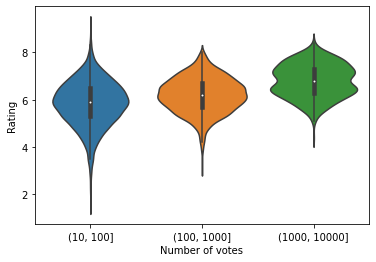

In [11]:
# 1. Calculate the minimum and maximum vote counts
min_vote_count = df["vote_count"].min()
max_vote_count = df["vote_count"].max()

# 2. Create the bin edges using logspace
# bin_edges = np.logspace(np.log10(min_vote_count), np.log10(max_vote_count), num=4)
bin_edges = [10, 100, 1000, 10000]

# 3. Bin the data
bins = pd.cut(df["vote_count"], bin_edges)  # labels=['low', 'medium', 'high']

# 4. Plot the distribution of vote_average for each bin
ax = sns.violinplot(x=bins, y="vote_average", data=df)
ax.set(xlabel="Number of votes", ylabel="Rating")


The violin plot shows that actually movies with higher numbers of votes actually have a higher mean rating but lower standard deviation.

#### Number of votes analysis - statistical

1. Group the data by the bins and compute the statistical summary for each group

In [12]:
# 1. Group the data by the bins and compute the statistical summary for each group
grouped = df.groupby(bins)["vote_average"]
summary = grouped.describe()

print(summary)


                count      mean       std  min  25%  50%  75%  max
vote_count                                                        
(10, 100]      7056.0  5.847066  0.952358  1.5  5.3  5.9  6.5  9.2
(100, 1000]    2746.0  6.201966  0.740066  3.1  5.7  6.2  6.7  8.0
(1000, 10000]   563.0  6.806394  0.693894  4.4  6.3  6.8  7.3  8.4


#### Investigate trend between movie genre and rating over time

Now we look at the average vote for movies by genre over time. 

1. Use `explode` to separate the `genres` column and use `groupby` to get the average vote for each genre by year.

In [13]:
# Groupby film ratings to genre and year

# 
li_column_avgs = ["vote_average"]

# 1. Use `explode` to separate the `genres` column and use `groupby` to get the average vote for each genre by year.
df_genres_trend = (
    filtered_df.explode("genres")
    .groupby(["release_year", "genres"])[li_column_avgs]
    .mean()
    .unstack()
)

df_genres_mean = (
    filtered_df.groupby(["release_year"])[li_column_avgs].mean()    
)

# Show dataframe
df_genres_trend.head(10)


vote_average                                               \
genres             Action Adventure Animation Comedy Crime Documentary   
release_year                                                             
1960                 6.95  7.150000       NaN   7.90   NaN         NaN   
1961                  NaN  6.600000       6.6   7.00   6.6         NaN   
1962                 6.80  7.100000       NaN    NaN   7.7         NaN   
1963                 6.70  7.100000       6.7   7.15   6.8         NaN   
1964                 7.00  7.000000       NaN   7.45   NaN         NaN   
1965                 6.30  6.300000       NaN    NaN   NaN         NaN   
1966                  NaN       NaN       7.1   7.10   NaN         NaN   
1967                 6.70  6.800000       7.0   7.50   7.4         NaN   
1968                 6.80  7.100000       NaN   6.60   6.7         NaN   
1969                 6.50  6.733333       NaN    NaN   6.8         NaN   

                                                                            \
genres           Drama Family Fantasy History Horror Music Mystery Romance   
release_year                                                                 
1960          7.600000    NaN     7.3     6.9   8.00   NaN     NaN    7.60   
1961          7.000000   6.60     NaN     NaN    NaN  6.60     NaN    7.40   
1962          7.250000    NaN     NaN     7.2    NaN   NaN     NaN    6.90   
1963          7.500000   6.70     NaN     7.5   7.00   NaN     7.5    7.50   
1964          7.400000   7.15     7.2     NaN    NaN  7.15     NaN    7.10   
1965          7.050000   7.20     NaN     NaN    NaN  7.20     NaN    7.05   
1966          6.800000   7.10     NaN     NaN    NaN   NaN     6.8     NaN   
1967          7.433333   7.00     NaN     NaN    NaN   NaN     NaN    7.50   
1968          6.966667   6.60     6.6     6.9   7.25   NaN     7.4     NaN   
1969          6.866667    NaN     NaN     7.0    NaN   NaN     NaN     NaN   

                                                              
genres       Science Fiction TV Movie  Thriller  War Western  
release_year                                                  
1960                    7.30      NaN  7.650000  NaN     7.0  
1961                     NaN      NaN       NaN  NaN     NaN  
1962                     NaN      NaN  6.700000  7.2     7.1  
1963                     NaN      NaN  7.233333  7.5     NaN  
1964                     NaN      NaN  7.000000  7.7     NaN  
1965                     NaN      NaN  6.300000  6.9     NaN  
1966                     NaN      NaN  6.800000  NaN     NaN  
1967                     NaN      NaN  6.200000  7.2     NaN  
1968                    7.45      NaN  6.700000  6.9     NaN  
1969                     NaN      NaN  6.400000  NaN     7.1

#### Plot rolling average

As the average genre rating is highly variable year-by-year according to the movies released, we can better understand the popularity/success of genres over time by looking at the rolling average film rating.

1. Calculate mean rolling average over 5-year window
2. Plot line graph. Mean rating for all genres over time given my thick blue line.



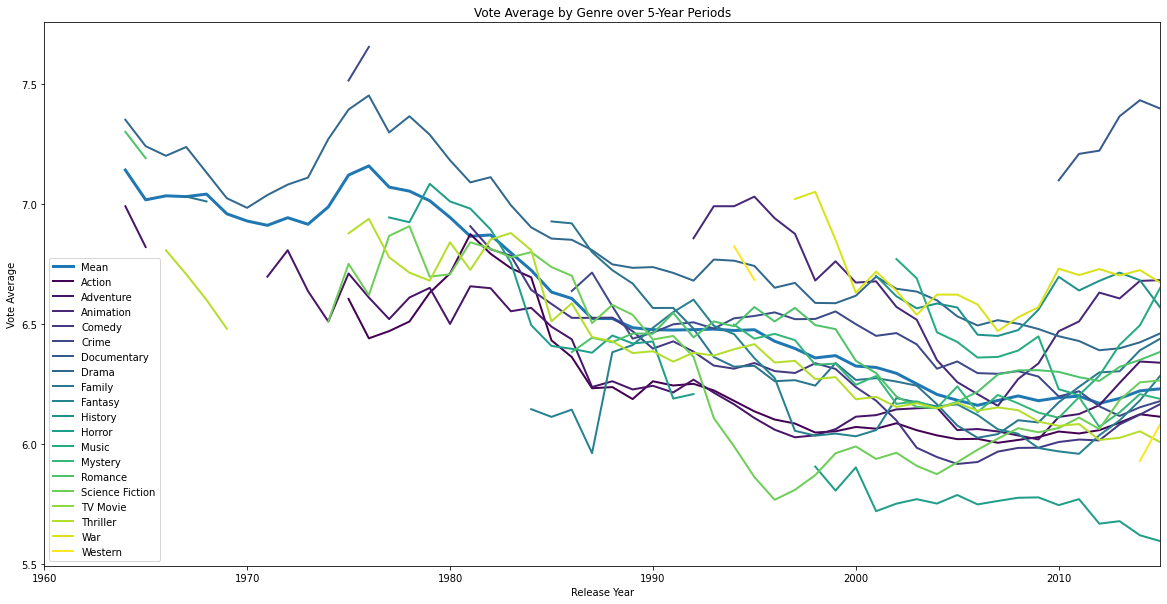

In [14]:
# 1. Calculate mean rolling average over 5-year window
df_genres_trend_rolling = df_genres_trend["vote_average"].rolling(5).mean()
df_genres_mean_rolling = df_genres_mean["vote_average"].rolling(5).mean()

# 2. Plot line graph
fig = plt.figure()
ax = plt.gca()

color_palette = sns.color_palette("muted", n_colors=20)
df_genres_mean_rolling.plot(ax=ax, linewidth=3, label='Mean')
df_genres_trend_rolling.plot(ax=ax, linewidth=2, colormap='viridis')

plt.xlabel("Release Year")
plt.ylabel("Vote Average")
plt.title("Vote Average by Genre over 5-Year Periods")
plt.gcf().set_size_inches(20, 10)
plt.legend(loc='best')
plt.show()


In this plot we can see the trends in genre ratings. Note that some gaps are caused by incomplete data for some years preventing the rolling-average being calculated.

Some clear examples include:
- Average rating has a negative correlation to release year. There are many factors which could contribute to this, including older critically-aclaimed movies receiving more ratings as people watch them and bump the ratings up while less successful movies are forgotten. Over time it has also become easier and cheaper to produce and distribute movies, which could lead to average ratings decreasing as more movies are produced than previously.  
- In the 2010s the genres which experienced the greatest rise in average ratings were: animation, war, history
- Fantasy movies had a peak rating in the early 1990s. Other trends can be seen across all genres, such as thriller movie ratings peaking in the mid-1970s.
- The recent genre of *TV Movie* currently has the highest average rating.

### 2. What are the most significant qualitative parameters for average rating and what are examples of the most successul values of each parameter?

#### Genre analysis

1. Group by genres and calculate metrics: count (number of data points in group), mean popularity, average vote, and list of films in group.
2. Sort by `vote_average`

In [23]:
# Aggregate mean popularity,vote average, and list of films grouped by a column 'col'
def agg_by_group(df, col):
    df_agg = (
        filtered_df.explode(col)
        .groupby([col])
        .agg(
            count=("popularity", "size"),
            popularity_mean=("popularity", "mean"),
            vote_average=("vote_average", "mean"),
            films=("original_title", "unique"),
        )
        .reset_index()
    )
    return df_agg


# Genres analysis
df_genre_analysis = agg_by_group(filtered_df, "genres")

# Sort by vote_average
df_genre_analysis.sort_values(by=["vote_average"], ascending=False)

,genres,count,popularity_mean,vote_average,films
5,Documentary,36,0.446674,7.200000,"[Amy, Cobain: Montage of Heck, Hot Girls Wante..."
17,War,95,1.481273,6.801053,"[The Hunger Games: Mockingjay - Part 2, Eye in..."
9,History,103,1.123772,6.771845,"[Spotlight, Steve Jobs, In the Heart of the Se..."
11,Music,99,1.157559,6.575758,"[Pitch Perfect 2, Straight Outta Compton, Magi..."
2,Animation,261,1.598356,6.572797,"[Minions, Inside Out, The Good Dinosaur, Home,..."
6,Drama,1403,1.232426,6.559800,"[The Revenant, The Martian, Ex Machina, The Ha..."
18,Western,44,1.392580,6.484091,"[The Revenant, The Hateful Eight, Slow West, B..."
4,Crime,550,1.309967,6.365273,"[Furious 7, Spectre, The Hateful Eight, Taken ..."
13,Romance,533,1.197509,6.351407,"[Cinderella, Fifty Shades of Grey, Brooklyn, T..."
12,Mystery,284,1.370826,6.291549,"[The Hateful Eight, Tomorrowland, Mr. Holmes, ..."


The film genres which receive the highest average ratings are:

1. Documentary
2. War - This includes fictional/non-fictional films where war plays a major role.
3. History - This includes documentaries and dramatisations of historical events.

Text(0.5, 1.0, 'Mean popularity & vote average for genres')

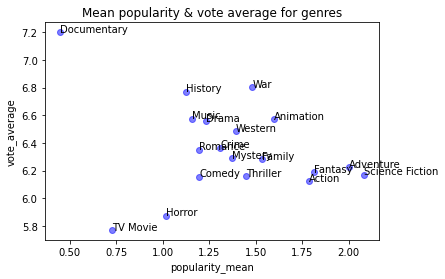

In [16]:
# Scatter plot - popularity_mean & vote_average
fig = plt.figure()
ax = plt.gca()
ax.scatter(
    df_genre_analysis["popularity_mean"],
    df_genre_analysis["vote_average"],
    c="b",
    alpha=0.5,
)

# Label each point with the string in the 'genre' column
for i, txt in enumerate(df_genre_analysis["genres"]):
    plt.annotate(txt, (df_genre_analysis["popularity_mean"][i], df_genre_analysis["vote_average"][i]))


plt.xlabel("popularity_mean")
plt.ylabel("vote_average")
plt.title("Mean popularity & vote average for genres")


#### Cast analysis

1. Group by cast and calculate metrics: count (number of data points in group), mean popularity, average vote, and list of films in group.
2. Filter rows with few appearances - this is to remove cast members which appear in one or two highly rated movies.
3. Sort by `vote_average`

In [24]:
# Cast analysis

# 1. Group by cast 
df_cast_analysis = agg_by_group(filtered_df, "cast")

# 2. Filter rows with few appearances
df_cast_analysis = df_cast_analysis.query("count >= 5")

# 3. Sort by `vote_average`
df_cast_analysis.sort_values(by=["vote_average"], ascending=False).head(20)

,cast,count,popularity_mean,vote_average,films
840,Carrie Fisher,7,5.374329,7.428571,"[Star Wars: The Force Awakens, Star Wars, The ..."
4500,Paul Dano,7,1.609267,7.342857,"[Love & Mercy, Looper, Ruby Sparks, 12 Years a..."
3076,Julie Delpy,5,0.989451,7.220000,"[Waking Life, Before Midnight, Broken Flowers,..."
1492,Domhnall Gleeson,7,3.496552,7.214286,"[The Revenant, Ex Machina, Brooklyn, Unbroken,..."
4217,MÃ©lanie Laurent,5,2.749449,7.140000,"[Enemy, Inglourious Basterds, La Rafle, Beginn..."
4063,Michael McKean,5,0.925274,7.140000,"[Whatever Works, Batman: The Dark Knight Retur..."
5013,Rupert Grint,10,4.806339,7.130000,"[Harry Potter and the Half-Blood Prince, Harry..."
1837,Faye Dunaway,5,0.804428,7.120000,"[Joan of Arc, Chinatown, Three Days of the Con..."
3259,Ken Watanabe,5,3.150239,7.120000,"[Godzilla, Inception, The Last Samurai, Letter..."
1223,Daniel Day-Lewis,5,1.271393,7.100000,"[Gangs of New York, Lincoln, There Will Be Blo..."


The cast members which receive the highest average ratings are:

1. Carrie Fisher
2. Paul Dano
3. Julie Delpy
4. Domhnall Gleeson
5. Michael McKean

This list includes cast members who appear in highly successful series (Carrie Fisher - Star Wars, Domhnall Gleeson - Harry Potter) or multiple critically acclaimed films (Paul Dano - There Will Be Blood, 12 Years a Slave, Prisoners).

This list is highly dependent on the minimum number of appearances used in the filter.

#### Production company analysis

1. Group by production company and calculate metrics: count (number of data points in group), mean popularity, average vote, and list of films in group.
2. Filter rows with few appearances - this is to remove production company which have published only one or two highly rated movies.
3. Sort by `vote_average`

In [25]:
# Production company analysis

# 1. Group by production company
df_production_companies_analysis = agg_by_group(filtered_df, "production_companies")

# 2. Filter rows with few appearances - this is to remove production company which have published only one or two highly rated movies.
df_production_companies_analysis = df_production_companies_analysis.query("count > 4")

# 3. Sort by `vote_average`
df_production_companies_analysis = df_production_companies_analysis.sort_values(
    by=["vote_average"], ascending=False
)

# See df
df_production_companies_analysis.head(20)


,production_companies,count,popularity_mean,vote_average,films
38,A Band Apart,6,4.581651,7.366667,"[Inglourious Basterds, Pulp Fiction, Kill Bill..."
2496,Syncopy,9,7.050715,7.344444,"[Interstellar, Transcendence, Inception, The D..."
2017,Pixar Animation Studios,31,2.064903,7.316129,"[Inside Out, The Good Dinosaur, Lava, Riley's ..."
1163,Heyday Films,14,4.426882,7.250000,"[Paddington, Testament of Youth, Harry Potter ..."
2181,River Road Entertainment,6,1.622961,7.116667,"[Love & Mercy, The Runaways, Fair Game, 12 Yea..."
2872,WingNut Films,13,4.167958,7.100000,"[The Hobbit: The Battle of the Five Armies, Di..."
1043,Ghoulardi Film Company,6,1.252077,7.066667,"[Inherent Vice, Magnolia, Punch-Drunk Love, Th..."
1636,Marvel Studios,13,6.311007,7.030769,"[Avengers: Age of Ultron, Ant-Man, Guardians o..."
2583,The Ladd Company,7,1.604148,7.000000,"[Police Academy 2: Their First Assignment, Gon..."
2833,Warner Premiere,7,1.036482,7.000000,"[Batman: Assault on Arkham, Son of Batman, Ano..."


The production companies which receive the highest average ratings are:

1. A Band Apart
2. Syncopy
3. Pixar Animation Studios
4. Heyday Films
5. River Road Entertainment

The top companies in this list have one highly successful director who has directed the majority of the movies they have published: A Band Apart (Quentin Tarantino) and Syncopy (Christopher Nolan), whereas other highly-ranking studios include those which have published highly successful film series / "universes" (Heyday Films - Harry Potter, WingNut Films - Lord of the Rings, Marvel Studios - Marvel cinematic universe) and companies which fill a particular niche (Pixar Animation Studios - animated movies). 

#### Keywords analysis

1. Group by keywords and calculate metrics: count (number of data points in group), mean popularity, average vote, and list of films in group.
2. Filter rows with few appearances - this is to remove keywords which have published only one or two highly rated movies.
3. Sort by `vote_average`

In [26]:
# keywords analysis

# 1. Group by keywords and calculate metrics
df_keyword_analysis = agg_by_group(filtered_df, "keywords")

# 2. Filter rows with few appearances - this is to remove keywords which have published only one or two highly rated movies.
df_keyword_analysis = df_keyword_analysis.query("count >= 5")

# 3. Sort by `vote_average`
df_keyword_analysis.sort_values(
    by=["vote_average"], ascending=False
).head(20)

,keywords,count,popularity_mean,vote_average,films
3004,pixar animated short,10,0.545505,7.620000,"[Lava, Toy Story That Time Forgot, Feast, Day ..."
2533,middle-earth (tolkien),6,7.082911,7.516667,"[The Hobbit: The Battle of the Five Armies, Th..."
2840,orcs,6,7.082911,7.516667,"[The Hobbit: The Battle of the Five Armies, Th..."
1006,cutting the cord,6,5.479067,7.333333,"[Harry Potter and the Philosopher's Stone, Har..."
2043,individual,16,1.574156,7.331250,"[Being John Malkovich, The Straight Story, A B..."
2666,musician,6,1.205692,7.300000,"[If I Stay, Frank, Love & Mercy, Searching for..."
1756,great britain,5,1.682783,7.220000,"[Kingsman: The Secret Service, The Boat That R..."
45,aids,9,1.160154,7.211111,"[Straight Outta Compton, The Normal Heart, Pre..."
3252,rebel,11,2.739602,7.181818,"[Never Back Down, Brave, Children of Men, Bloo..."
4170,train station,5,1.444357,7.160000,"[Paddington, Paperman, The Italian Job, The St..."


Top-rated keywords cover a wide range of topics, though some can be categorised into certain themes:

1. Hard-hitting topics (aids, isolation, child abuse, racism, prohibition, war, drug smuggle, ...)
2. Pop culture universes (middle-earth (tolkien), orcs)

#### Qualitative parameter analysis

The mean `vote_average` over the top 10 values for each parameter are:

1. keywords
2. actor
3. production company
4. genre

We can look at a heatmap to visualise the correlation between two of these parameters. Due to the size of the datasets created by using groupby on two of these parameters we can filter by number of appearances in the dataset until we have a reasonable size of dataset. This will be done on production company and genre as these datasets are more manageable in size.

1. Create dataset - explode, groupby, then filter on `production_companies` for companies which appear >50 times. Then explode on `genres` and groupby on `"production_companies", "genres"` to create the dataset. Filter all groups which `"count > 1"` to remove outliers.

In [27]:
# Dual qualitative parameter analysis

# 1. Group and calculate metrics for production_companies
df_prod_genre_analysis = agg_by_group(filtered_df, "production_companies")

df_prod_genre_analysis.head(50)


,production_companies,count,popularity_mean,vote_average,films
0,"""DIA"" Productions GmbH & Co. KG",1,1.626534,5.700000,[A Man Apart]
1,10th Hole Productions,1,0.686330,6.400000,[The Kids Are All Right]
2,11:11 Mediaworks,1,0.727752,5.200000,[The Omen]
3,12 Gauge Productions,1,0.764355,7.000000,[Dead Man]
4,120dB Films,1,1.049952,5.200000,[The Colony]
5,13 Ghosts Productions Canada Inc.,1,0.648659,5.200000,[Thir13en Ghosts]
6,1492 Pictures,15,2.854995,6.300000,"[Night at the Museum: Secret of the Tomb, Nigh..."
7,1984 Private Defense Contractors,6,1.286257,6.050000,"[The Voices, A Walk Among the Tombstones, Mach..."
8,2 Entertain,1,0.794400,6.900000,[Becoming Jane]
9,2003 Productions,1,0.756105,6.900000,[Un long dimanche de fianÃ§ailles]


#### Plot

1. pivot the dataframe to create the heatmap input
2. create the heatmap plot
3. set the title and labels


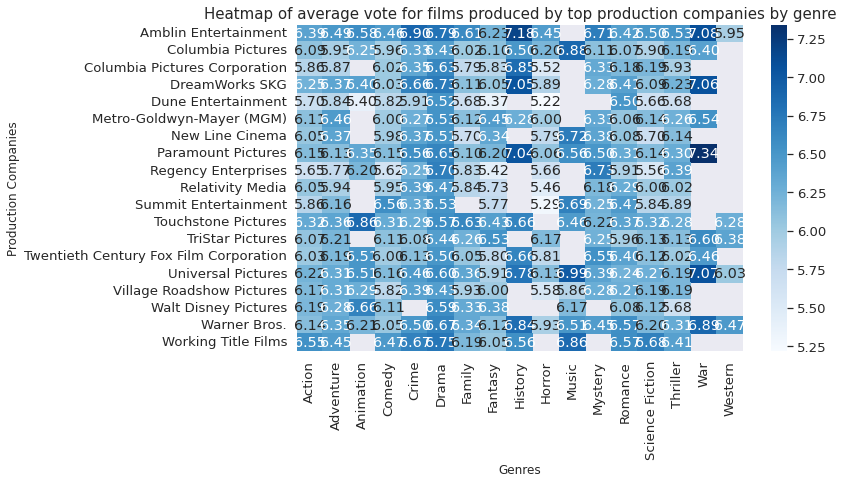

In [21]:
# pivot the dataframe to create the heatmap input
pivot_df = df_prod_genre_analysis.pivot(
    index="production_companies", columns="genres", values="vote_average"
)

# create the heatmap plot
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="Blues")

# set the title and labels
plt.title(
    "Heatmap of average vote for films produced by top production companies by genre",
    fontsize=15,
)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Production Companies", fontsize=12)

# show the plot
plt.show()


In the heatmap, the specialisations of production companies are apparent, for instance: *Amblin Entertainment* has the highest ratings in the War (War Horse, ...) and History (Saving Private Ryan, ...) categories while *Walt Disney Pictures* has the highest ratings in Animation.

<a id='conclusions'></a>
## Conclusions

### Summary

In conclusion, if we want to create the highest-ranked movie of all time a good option would be to combine the parameters identified in this analysis: for example a *TV Movie* movie set in the *Tolkein universe* headlined by *Paul Dano* with themes of *hard-hitting topics* and produced by *Syncopy* (directed by Chrisopher Nolan) which reaches the *largest audience possible* (higher vote count) and with a *long run-time* and should be released *as soon as possible* (as average movie ratings are decreasing year-on-year). 

This example hints at the weaknesses to this analysis, as it is not likely this movie would be successful.

Instead, the main conclusions that can be drawn are:
- The numerical parameters with the strongest correlation to movie ratings are vote count, runtime, and release year.
- Trends in movie ratings by year are decreasing year-on-year. Genres which are currently recieving high ratings are TV Movies, Animation, Adventure, and History.
- Qualitative parameters have a strong correlation to movie rating: in order keywords, actor, production company, genre.
- Qualitative parameters are not independently variable so therefore their correlation to other parameters should be considered. For instance a popular actor such as Leonardo DiCaprio may produce a large number of his films with a certain production company.


### Limitations

Some limitations of this analysis are:
- It is likely there are many factors which contribute towards movie ratings which are not captured in the data in the TMDb dataset. 
- It is not likely that movie ratings are directly correlated to one or two parameters, as can be seen by the low correlations with quantitative parameters. Instead, they may have a complex correlation to a large number of variables which is not investigated in this analysis.
- Dual qualitative parameter analysis is performed on production companies which have published a large number of movies in order to restrict the size of the dataset for visualisation. This means that some strong correlations between certain parameters (e.g. other production companies) may have been discarded.
- Due to the dimentionality of the dataset there are many other options for analysis, such as other qualitative parameters and other trends over time.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0